In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import sklearn

In [5]:
submission = pd.read_csv("C:/Users/tnrek/assignment/data/gender_submission.csv")

In [6]:
train = pd.read_csv("C:/Users/tnrek/assignment/data/train.csv")

In [7]:
test = pd.read_csv("C:/Users/tnrek/assignment/data/test.csv")

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### Survived: 0=사망 1=생존
###### Pclass: 티켓 클래스 1등석,2등석,3등석
###### SibSP: 함께 탑승한 형제,자매,배우자수 총합
###### Parch: 함께 탑승한 부모,자녀 수 총합
###### Ticket: 티켓 번호
###### Fare: 탑승 요금
###### Cabin: 객실 번호
###### Embarked: 탑승 항구

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train.shape

(891, 12)

In [11]:
test.shape

(418, 11)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age와 Cabin의 데이터가 유실

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
def bar_chart(Feature):
    survived = train[train['Survived']==1][Feature].value_counts()
    dead = train[train['Survived']==0][Feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

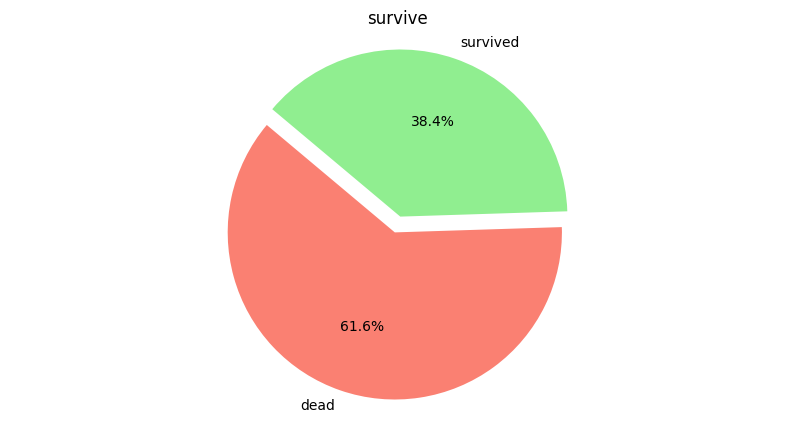

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
train['Survived'].value_counts()
survived_counts = train['Survived'].value_counts()
labels = ['dead','survived']
sizes = survived_counts.sort_index().values
colors = ['salmon','lightgreen']

plt.figure(figsize=(10,5))
plt.pie(sizes, labels=labels ,colors=colors,autopct='%1.1f%%',startangle=140,explode=(0.05,0.05))
plt.title('survive')
plt.axis('equal')
plt.show()
train['Survived'].value_counts()

사망자의 비율이 생존자보다 월등히 많은 것을 볼 수 있다

,Survived
Sex,
female,0.742038
male,0.188908


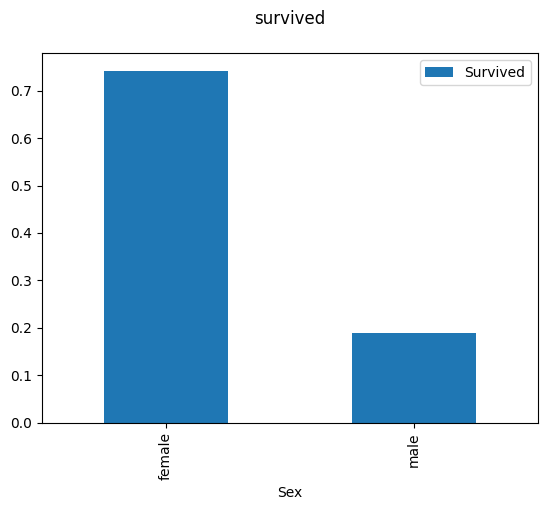

In [16]:
sur = train[['Sex','Survived']].groupby('Sex').mean().plot.bar()
sur.set_title("survived\n")
train[['Sex','Survived']].groupby('Sex').mean()

남성의 사망 비율이 여성보다 매우 큰 것을 볼 수 있다.

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

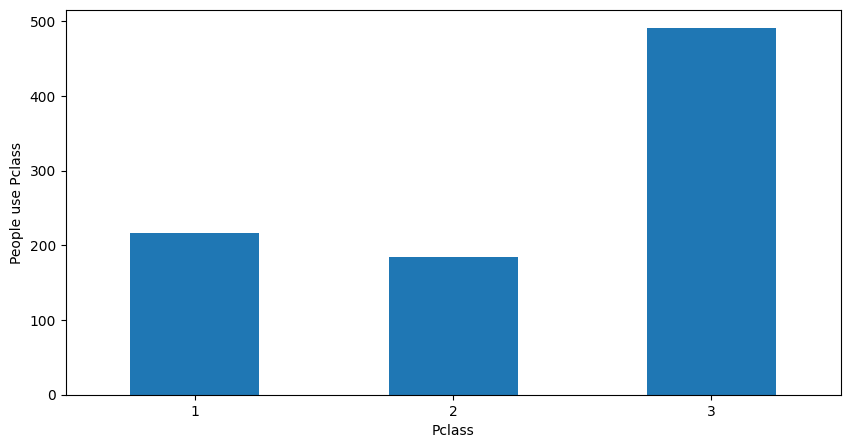

In [17]:
Pclass_counts = train['Pclass'].value_counts().sort_index()

plt.figure(figsize=(10,5))
Pclass_counts.plot(kind='bar')
plt.title('')
plt.xlabel('Pclass')
plt.ylabel('People use Pclass')
plt.xticks(rotation=0)
plt.show
Pclass_counts

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


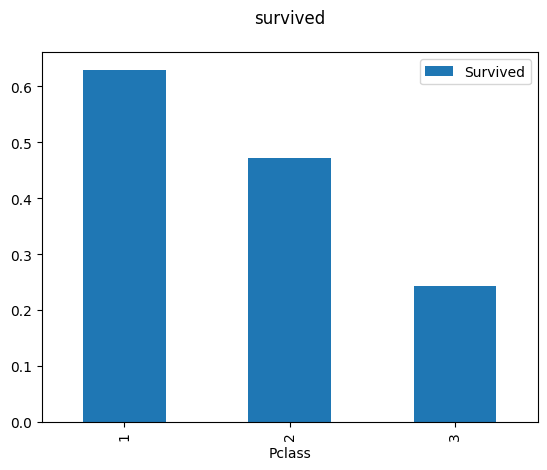

In [18]:
sur2 = train[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()
sur2.set_title("survived\n")
train[['Pclass','Survived']].groupby('Pclass').mean()

1등급 티켓의 사람이 생존 확률이 높고 등급이 낮을 수록 사망자가 높은 결과가 나왔다.

In [19]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

탑승객의 나이대는 영아부터 노인까지 다양하지만 20~30대의 비율이 매우 높은것을 볼 수 있따.

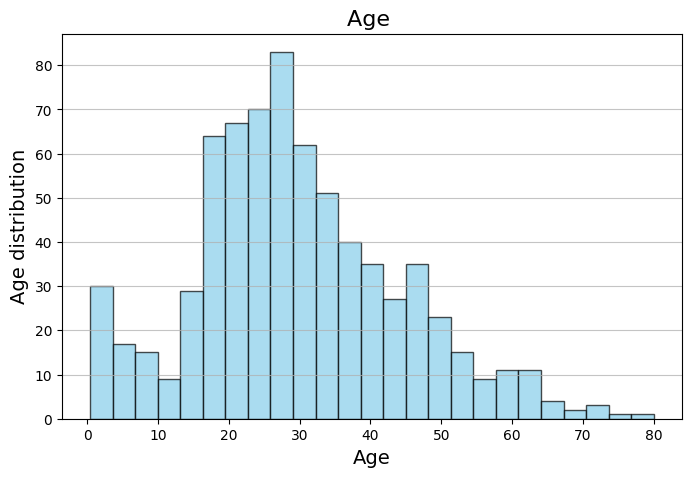

In [20]:
# 히스토그램 그리기
plt.figure(figsize=(8, 5))  # 그래프 크기 설정
plt.hist(train['Age'].dropna(), bins=25, color='skyblue', edgecolor='black', alpha=0.7)

# 그래프 제목 및 축 레이블 설정
plt.title('Age ', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Age distribution', fontsize=14)

# 그리드 추가 (옵션)
plt.grid(axis='y', alpha=0.75)

# 그래프 표시
plt.show()

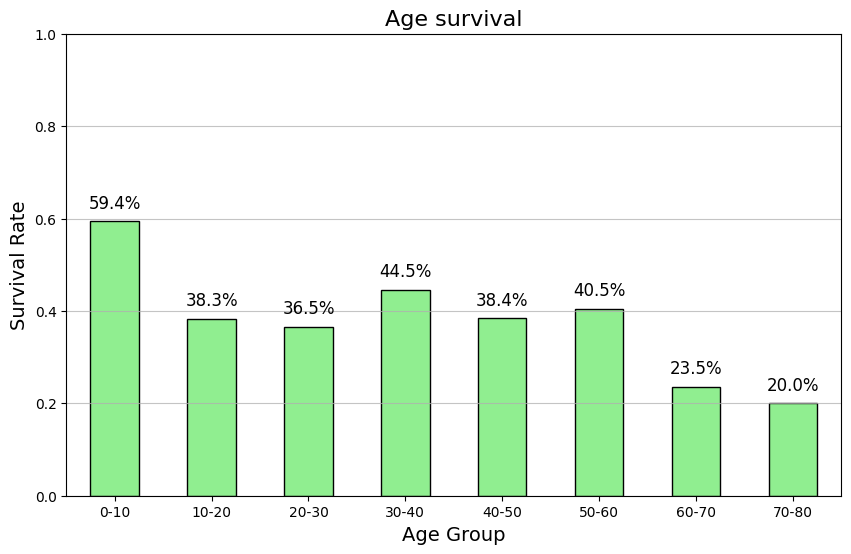

In [21]:
# 'Age' 열의 결측치를 제거하고, 나이대별로 그룹화하기 위한 범위와 레이블 설정
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# 'AgeBin' 열 생성
train['AgeBin'] = pd.cut(train['Age'], bins=bins, labels=labels)

# 나이대별 생존률 계산
age_survival_rate = train.groupby('AgeBin',observed=True)['Survived'].mean()

# 히스토그램 대신 막대그래프로 생존률 시각화
plt.figure(figsize=(10, 6))
age_survival_rate.plot(kind='bar', color='lightgreen', edgecolor='black')

# 그래프 제목 및 축 레이블 설정
plt.title('Age survival', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.ylim(0, 1)  # y축 범위를 0부터 1로 설정

# x축 레이블을 수평으로 설정
plt.xticks(rotation=0)

# 각 막대 위에 생존률 값 표시
for index, value in enumerate(age_survival_rate):
    plt.text(index, value + 0.02, f'{value*100:.1f}%', ha='center', va='bottom', fontsize=12)

# 그리드 추가 (옵션)
plt.grid(axis='y', alpha=0.75)

# 그래프 표시
plt.show()

어린아이들의 생존률이 제일 높고 60대 이상의 탑승객의 생존률은 매우 적은 것을 볼 수 있다

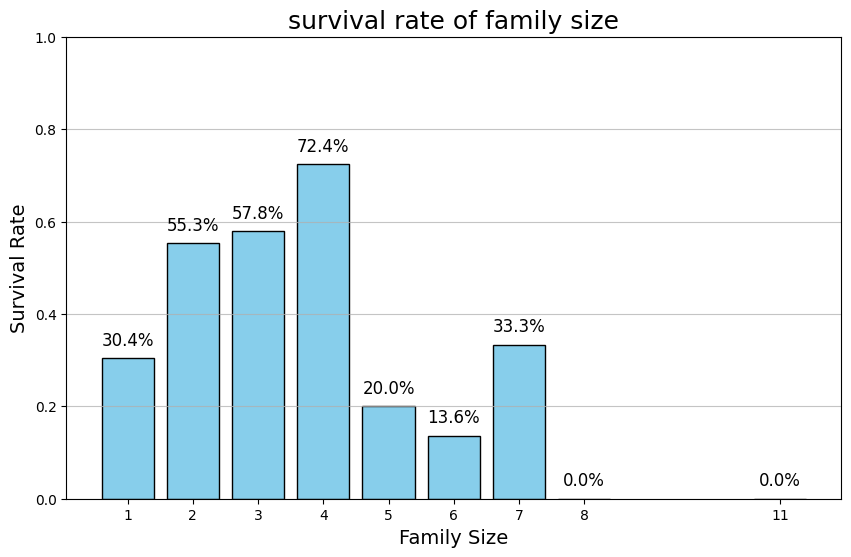

In [22]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
family_survival_rate = train.groupby('FamilySize', observed=True)['Survived'].mean()
plt.figure(figsize=(10, 6))
bars = plt.bar(family_survival_rate.index, family_survival_rate.values, color='skyblue', edgecolor='black')

# 그래프 제목 및 축 레이블 설정
plt.title('survival rate of family size', fontsize=18)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.ylim(0, 1)  # y축 범위를 0부터 1로 설정

# x축 레이블을 수평으로 설정
plt.xticks(family_survival_rate.index, rotation=0)

# 각 막대 위에 생존률 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height*100:.1f}%', ha='center', va='bottom', fontsize=12)

# 그리드 추가 (옵션)
plt.grid(axis='y', alpha=0.75)

# 그래프 표시
plt.show()

sibsp와 parch에 본인 1을 더하여 가족 변수를 만들었다.
이를보면 2~4인가족은 생존률이 높지만 1인이거나 5인 이상의 가족은 생존률이 낮은 것을 볼 수 있다

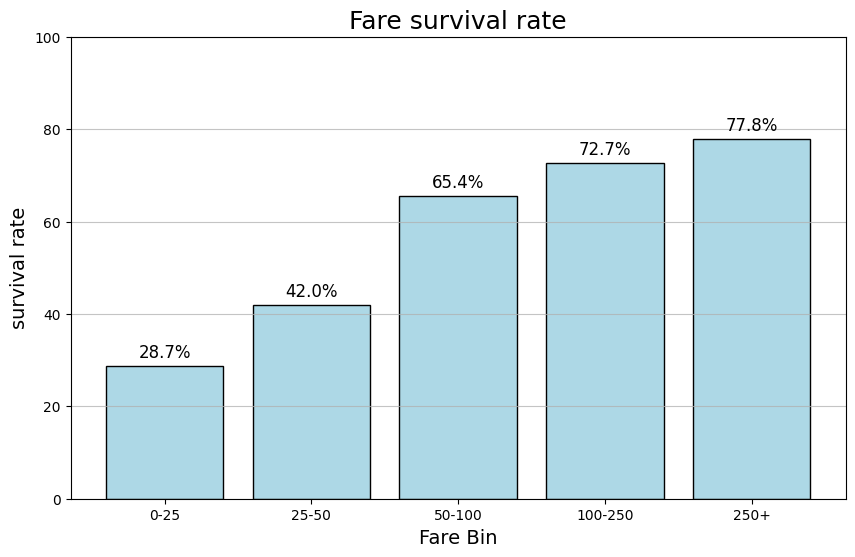

In [23]:
if train['Fare'].isnull().sum() > 0:
    train['Fare'].fillna(train['Fare'].median(), inplace=True)

# 'FareBin' 생성
bins = [0, 25, 50, 100, 250, train['Fare'].max()]
labels = ['0-25', '25-50', '50-100', '100-250', '250+']
train['FareBin'] = pd.cut(train['Fare'], bins=bins, labels=labels, include_lowest=True)

# 'FareBin' 별 생존률 계산
fare_survival_rate = train.groupby('FareBin', observed=True)['Survived'].mean()

# 생존률을 백분율로 변환
fare_survival_rate_percent = fare_survival_rate * 100


# 막대그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(fare_survival_rate.index, fare_survival_rate_percent.values, color='lightblue', edgecolor='black')

# 그래프 제목 및 축 레이블 설정
plt.title('Fare survival rate', fontsize=18)
plt.xlabel('Fare Bin', fontsize=14)
plt.ylabel('survival rate', fontsize=14)
plt.ylim(0, 100)  # y축 범위를 0부터 100%로 설정

# x축 레이블을 수평으로 설정
plt.xticks(rotation=0)

# 각 막대 위에 생존률 값 표시
for bar, rate in zip(bars, fare_survival_rate_percent):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{rate:.1f}%', ha='center', va='bottom', fontsize=12)

# 그리드 추가
plt.grid(axis='y', alpha=0.75)

# 그래프 표시
plt.show()

탑승 요금이 높을 수록 생존률이 높은것을 볼 수 있다. PClass 등급이 높을수록 생존률이 높은것과 관계가 있는 것으로 보인다

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


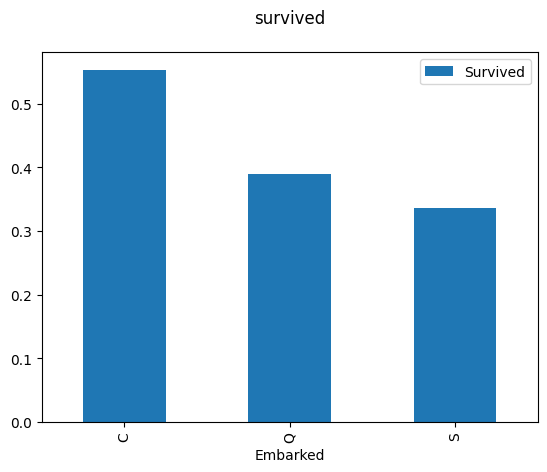

In [24]:
sur4 = train[['Embarked','Survived']].groupby('Embarked').mean().plot.bar()
sur4.set_title("survived\n")
train[['Embarked','Survived']].groupby('Embarked').mean()

C,Q,S 순으로 생존률이 높은 것을 알 수 있다.

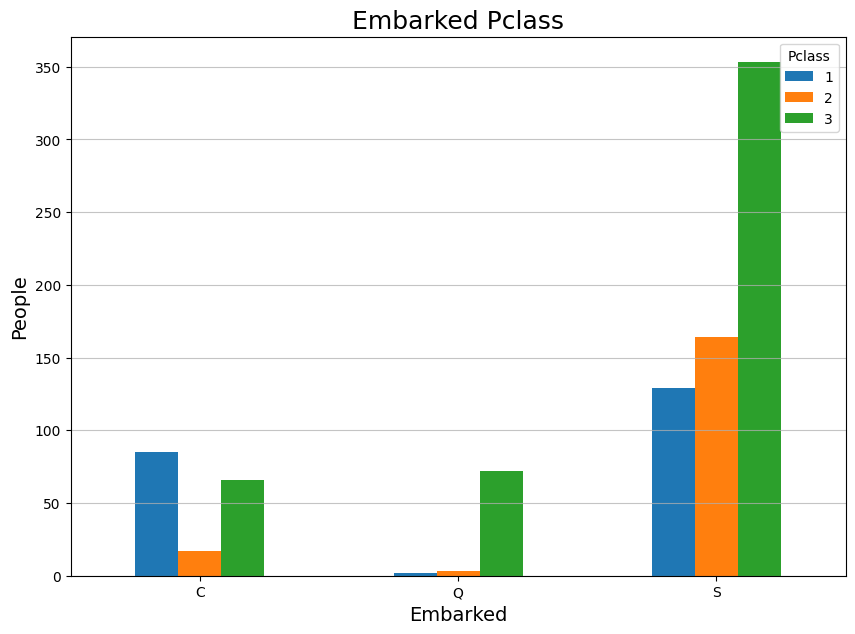

In [25]:
embarked_mode = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(embarked_mode)
if train['Embarked'].isnull().sum() > 0:
    train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# 항구별 티켓 등급 분포 계산
embarked_pclass_counts = train.groupby(['Embarked', 'Pclass']).size().unstack(fill_value=0)
embarked_pclass_counts.plot(kind='bar', figsize=(10, 7))

# 그래프 제목 및 축 레이블 설정
plt.title('Embarked Pclass', fontsize=18)
plt.xlabel('Embarked', fontsize=14)
plt.ylabel('People', fontsize=14)

# x축 레이블을 수평으로 설정
plt.xticks(rotation=0)

# 범례 위치 및 제목 설정
plt.legend(title='Pclass', loc='upper right')

# 그리드 추가 (옵션)
plt.grid(axis='y', alpha=0.75)

# 그래프 표시
plt.show()

각 항구별 Pclass분포이다. 위 분석에서 3등급 탑승객의 생존률이 낮았기에 3등급 탑승객의 비율이 매우 높은 S항구의 생존률이 낮은 원인을 알 수 있다.

### 데이터 정제

In [26]:
data_list = [train, test]

In [27]:
for data in data_list:
    data['Sex'] = data['Sex'].astype('category').cat.codes
    
train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int8

성별이 male,female로 나누어져 있는데 이를 0과1로 변경

In [28]:
sex_mean = train.groupby('Sex')['Age'].mean()
sex_mean

Sex
0    27.915709
1    30.726645
Name: Age, dtype: float64

In [29]:
# Age 결측치 처리
for data in data_list:
    data.loc[(data['Sex'] == 0) & (data['Age'].isnull()), 'Age'] = sex_mean[0]
    data.loc[(data['Sex'] == 1) & (data['Age'].isnull()), 'Age'] = sex_mean[1]
    
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeBin         177
FamilySize       0
FareBin          0
dtype: int64

Age에 결측치가 존재하는데 이 결측치에는 여성과 남성 각각의 평균 나이를 넣어 준다.

In [30]:
# 카테고리화
train['AgeRange'] = pd.cut(train['Age'], 5)
train[['AgeRange', 'Survived']].groupby(['AgeRange']).mean()

C:\Users\tnrek\AppData\Local\Temp\ipykernel_13356\452087332.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[['AgeRange', 'Survived']].groupby(['AgeRange']).mean()


,Survived
AgeRange,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.344168
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [31]:
for data in data_list:    
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4
train.drop('AgeRange', inplace=True, axis=1)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,FamilySize,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,NaN,S,20-30,2,0-25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,C85,C,30-40,2,50-100
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-30,1,0-25
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,C123,S,30-40,2,50-100
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,NaN,S,30-40,1,0-25


나이를 카테고리화 하는데 16,32,48,64의 값을 기준으로 카테고리화 하였다.

In [32]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\tnrek\AppData\Local\Temp\ipykernel_13356\2411080198.py:1: SyntaxWarning: invalid escape sequence '\.'
  train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

탑승객의 이름을 보면 앞에 명칭을 볼 수있는데 이 명칭은 의미가 없을 것으로 예상되어 이름을 간소화 한다.

In [33]:
for data in data_list:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess',
                                        'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'], 'Other')
    # -> 범주형 -> 수치형
    data['Title_name'] = data['Title'].astype('category').cat.codes

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\tnrek\AppData\Local\Temp\ipykernel_13356\686705810.py:2: SyntaxWarning: invalid escape sequence '\.'
  data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [34]:
# 불필요한 데이터 지우기
train.drop(['Name', 'Title'], axis=1, inplace = True)
test.drop(['Name', 'Title'], axis=1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,FamilySize,FareBin,Title_name
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,20-30,2,0-25,2
1,2,1,1,0,2.0,1,0,PC 17599,71.2833,C85,C,30-40,2,50-100,3
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-30,1,0-25,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,30-40,2,50-100,3
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,30-40,1,0-25,2


In [35]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,FamilySize,FareBin,Title_name
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,20-30,2,0-25,2
1,2,1,1,0,2.0,1,0,PC 17599,71.2833,C85,C,30-40,2,50-100,3
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-30,1,0-25,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,30-40,2,50-100,3
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,30-40,1,0-25,2


In [36]:
# 컬럼 제거
drop_list = ['SibSp', 'Parch']
for data in data_list:
    data.drop(drop_list, inplace=True, axis=1)

In [37]:
# 결측치 처리
for data in data_list:
    data['Embarked'] = data['Embarked'].fillna('S')

항구 결측치는 탑승객이 제일많은 S로 채움

In [38]:
em_mapping = {'S':0, 'C':1, 'Q':2}
for data in data_list:
    data['Embarked'] = data['Embarked'].map(em_mapping)

In [39]:
for data in data_list:
    data['Cabin'] = data['Cabin'].fillna('N')
    data['Cabin'] = data['Cabin'].apply(lambda x:x[0])
    data['Cabin'] = data['Cabin'].astype('category').cat.codes
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,AgeBin,FamilySize,FareBin,Title_name
0,1,0,3,1,1.0,A/5 21171,7.2500,7,0,20-30,2,0-25,2
1,2,1,1,0,2.0,PC 17599,71.2833,2,1,30-40,2,50-100,3
2,3,1,3,0,1.0,STON/O2. 3101282,7.9250,7,0,20-30,1,0-25,1
3,4,1,1,0,2.0,113803,53.1000,2,0,30-40,2,50-100,3
4,5,0,3,1,2.0,373450,8.0500,7,0,30-40,1,0-25,2


In [40]:
# 카테고리화
for data in data_list:
    data['Farerange'] = pd.cut(data['Fare'], 4)
train[['Farerange', 'Survived']].groupby(['Farerange']).mean()

C:\Users\tnrek\AppData\Local\Temp\ipykernel_13356\3903594166.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[['Farerange', 'Survived']].groupby(['Farerange']).mean()


,Survived
Farerange,
"(-0.512, 128.082]",0.368113
"(128.082, 256.165]",0.724138
"(256.165, 384.247]",0.666667
"(384.247, 512.329]",1.000000


In [41]:
for data in data_list:    
    data.loc[data['Fare'] <= 128, 'Fare'] = 0
    data.loc[(data['Fare'] > 128) & (data['Fare'] <= 256), 'Fare'] = 1
    data.loc[(data['Fare'] > 256) & (data['Fare'] <= 384), 'Fare'] = 2
    data.loc[data['Fare'] > 384, 'Fare'] = 3

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,AgeBin,FamilySize,FareBin,Title_name,Farerange
0,1,0,3,1,1.0,A/5 21171,0.0,7,0,20-30,2,0-25,2,"(-0.512, 128.082]"
1,2,1,1,0,2.0,PC 17599,0.0,2,1,30-40,2,50-100,3,"(-0.512, 128.082]"
2,3,1,3,0,1.0,STON/O2. 3101282,0.0,7,0,20-30,1,0-25,1,"(-0.512, 128.082]"
3,4,1,1,0,2.0,113803,0.0,2,0,30-40,2,50-100,3,"(-0.512, 128.082]"
4,5,0,3,1,2.0,373450,0.0,7,0,30-40,1,0-25,2,"(-0.512, 128.082]"


In [42]:
# 컬럼 지우기
for data in data_list:
    data.drop('Farerange', axis=1, inplace=True)

In [43]:
drop_list = ['PassengerId', 'Ticket']
for data in data_list:
    data.drop(drop_list, inplace=True, axis=1)
    
for data in data_list:
    data.drop('Cabin', inplace=True, axis=1)

In [44]:
test[test['Fare'].isnull()] = test['Fare'].mean()

C:\Users\tnrek\AppData\Local\Temp\ipykernel_13356\2391336004.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.09112709832134293' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test[test['Fare'].isnull()] = test['Fare'].mean()
C:\Users\tnrek\AppData\Local\Temp\ipykernel_13356\2391336004.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.09112709832134293' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  test[test['Fare'].isnull()] = test['Fare'].mean()
C:\Users\tnrek\AppData\Local\Temp\ipykernel_13356\2391336004.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.09112709832134293' has dtype incompatible with int64, please explicitly cast to a compatibl

In [45]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,AgeBin,FamilySize,FareBin,Title_name
0,0,3,1,1.0,0.0,0,20-30,2,0-25,2
1,1,1,0,2.0,0.0,1,30-40,2,50-100,3
2,1,3,0,1.0,0.0,0,20-30,1,0-25,1
3,1,1,0,2.0,0.0,0,30-40,2,50-100,3
4,0,3,1,2.0,0.0,0,30-40,1,0-25,2


In [46]:
train = train.drop('AgeBin',axis=1)

In [47]:
train = train.drop('FareBin',axis=1)

In [48]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title_name
0,0,3,1,1.0,0.0,0,2,2
1,1,1,0,2.0,0.0,1,2,3
2,1,3,0,1.0,0.0,0,1,1
3,1,1,0,2.0,0.0,0,2,3
4,0,3,1,2.0,0.0,0,1,2


In [49]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,3.0,1.0,2.0,0.0,2.0,3.0,2.0
1,3.0,0.0,2.0,0.0,0.0,4.0,2.0
2,2.0,1.0,3.0,0.0,2.0,3.0,1.0
3,3.0,1.0,1.0,0.0,0.0,3.0,2.0
4,3.0,0.0,1.0,0.0,0.0,4.0,1.0


In [50]:
train_input = train.drop('Survived', axis=1).values
train_target = train['Survived'].values
print(train_input.shape, train_target.shape)  #(891, 7) (891,)

(891, 7) (891,)


In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

C:\Users\tnrek\assignment\.venv\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [52]:
model = KNeighborsClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.8369821296310886 0.8013495700207143


### KNN
##### 학습데이터의 정확도는 약 84%, 테스트셋의 정확도는 약 80%

In [53]:
model = DecisionTreeClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.872335203366059 0.8024982738057874

0.872335203366059 0.8024982738057874


#### Decision Tree
##### 학습데이터 정확도 87%, 테스트 셋의 정확도 약 80%
##### 과제적합으로 보임

In [54]:
model = RandomForestClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.872335203366059 0.7980164459230431

0.872335203366059 0.8069801016885318


### Random Forest
##### 학습 셋 정확도 약 87%, 테스트 셋 약 80% 
##### 과대 적합으로 보임

In [55]:
model = GradientBoostingClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8555009691602187 0.8204632477559475

0.8555009691602187 0.8204632477559475


### GradientBoosting
#### 학습 셋의 정확도는 약 86%, 테스트 셋의 정확도 약 82%

In [56]:
model = HistGradientBoostingClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8597093307278945 0.8126043562864854

0.8594288258190586 0.8148515472977215


### HistGradientBoosting
#### 학습셋 정확률 약 86%,테스트 셋 정확률 약81%

In [57]:
model = GaussianNB()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8117284145169169 0.812560416797439

0.8117284145169169 0.812560416797439


### Naive Bays
#### 학습 셋 정확률 약 81%,테스트 셋 정확률 약 81%

In [58]:
model = SVC()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8366992609168413 0.8349946644906158

0.8366992609168413 0.8349946644906158


### Support Vector Machine
#### 학습셋 정확도 약 84%,테스트셋 83%

### 최종 모델 KNN으로 결정

In [59]:
model = KNeighborsClassifier()
model.fit(train_input, train_target)
test_input = test.values
pred = model.predict(test_input)

submission['Survived'] = pred

In [60]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,1


In [67]:
submission.to_csv("C:/Users/tnrek/assignment/data/submission_result.csv", index = False)

#### 모델 적용 후 제출용 csv파일 생성 완료

In [72]:
pip list

Package                   Version
------------------------- --------------
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.7
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.1.0
fastjsonschema            2.20.0
fonttools                 4.54.1
fqdn                      1.5.1
h11                       0.14.0
httpcore                  1.0.6
httpx                     0.27.2
idna                      3.10
ipykernel